# <span style = "color:gray"> Bank Marketing Term Deposit Prediction </span>

***

This is the classic marketing bank dataset uploaded originally in the UCI Machine Learning Repository. The dataset gives information about a marketing campaign of a financial institution in which you will have to analyze in order to find ways to look for future strategies in order to improve future marketing campaigns for the bank.

## <span style = "color: blue"> Attributes </span>

* age : Age in years
* job : type of job (categorical: ‘admin.’,’blue-collar’,’entrepreneur’,’housemaid’,’management’,’retired’,’self-employed’,’services’,’student’,’technician’,’unemployed’,’unknown’)
* marital : marital status (categorical: ‘divorced’,’married’,’single’,’unknown’; note: ‘divorced’ means divorced or widowed)
* education (categorical: ‘basic.4y’,’basic.6y’,’basic.9y’,’high.school’,’illiterate’,’professional.course’,’university.degree’,’unknown’)
* default: has credit in default? (categorical: ‘no’,’yes’,’unknown’)
* housing: has housing loan? (categorical: ‘no’,’yes’,’unknown’)
* loan: has personal loan? (categorical: ‘no’,’yes’,’unknown’)
* contact: contact communication type (categorical: ‘cellular’,’telephone’)
* month: last contact month of year (categorical: ‘jan’, ‘feb’, ‘mar’, …, ‘nov’, ‘dec’)
* day: day of the month
* duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y=’no’). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
* previous: number of contacts performed before this campaign and for this client (numeric)
* poutcome: outcome of the previous marketing campaign (categorical: ‘failure’,’nonexistent’,’success’)
* deposit : Yes, No

## Let's Get Started!

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'bank.csv' dataset and store it in a DataFrame Variable

In [2]:
df=pd.read_csv('bank.csv')

### View the top 5 rows

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### View info of the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


### View the basic Statistical information about the dataset

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


### Check for null values

In [6]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### View unique values in all categorical features

In [7]:
categorical_columns = df.drop(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'],axis=1)
                                 
categorical_columns.nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
poutcome      4
deposit       2
dtype: int64

In [8]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes


### Change categorical features into nominal by OneHotEncoding

#### Note: Make sure to exclude deposit column as it is our target variable

In [9]:
pd.set_option('display.max_columns', None) # Used to views columns nontruncated

In [10]:
df_nw=pd.get_dummies(df.drop(columns = ['deposit']), drop_first = True)
df_nw.head(2)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [11]:
df_nw['deposit']=df['deposit']

In [12]:
df_nw.tail(2)

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
11160,43,0,8,9,2,172,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,no
11161,34,0,9,628,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,no


### Create a function to change Yes to 1 and No to 0 in deposit 

In [13]:
def dep(x):
    if x=='yes':
        return 1
    elif x=='no':
        return 0

### Apply the function to deposit column

In [14]:
df_nw['deposit']=df_nw['deposit'].apply(dep)
df_nw.tail()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
11157,33,1,20,257,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11158,39,733,16,83,4,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
11159,32,29,19,156,2,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11160,43,0,8,9,2,172,5,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
11161,34,0,9,628,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [15]:
df_nw.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,deposit
0,59,2343,5,1042,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
1,56,45,5,1467,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
2,41,1270,5,1389,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
3,55,2476,5,579,1,-1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
4,54,184,5,673,2,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1


## <span style = "color: orange"> Visualization </span>

### Plot a displot of age

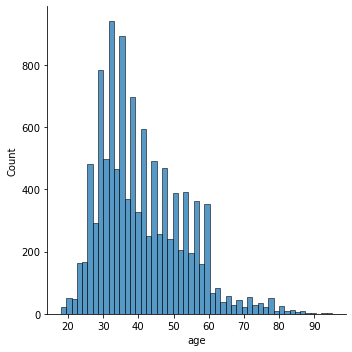

In [16]:
sns.displot(df_nw,x='age')

### Make a visualization of number of deposits per month

<AxesSubplot:xlabel='month', ylabel='count'>

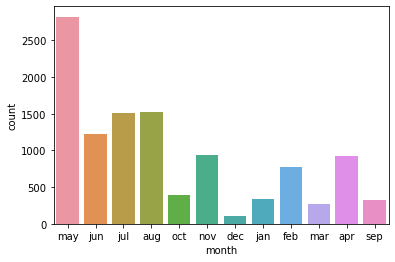

In [17]:
sns.countplot(x='month',data=df)

### Plot a countplot of 'housing' to visualize number of customers having housing loan

<AxesSubplot:xlabel='housing', ylabel='count'>

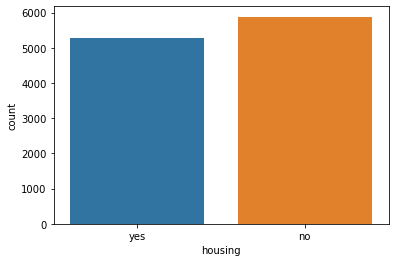

In [18]:
sns.countplot(x='housing',data=df)

### Plot a countplot to view the education of customers

<AxesSubplot:xlabel='education', ylabel='count'>

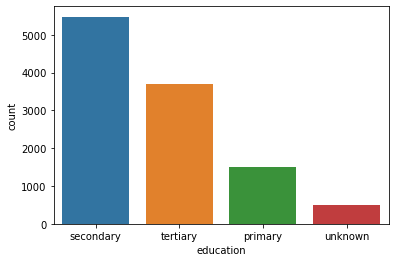

In [19]:
sns.countplot(x='education',data=df)

### Create a plot to visualize the count of jobs

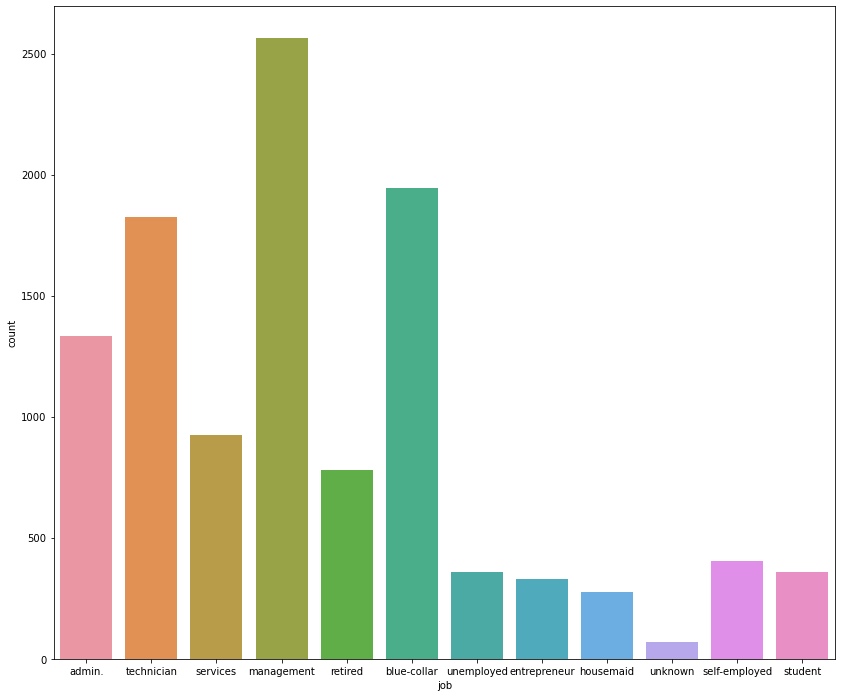

In [20]:
plt.figure(figsize=(14,12))
sns.countplot(x='job',data=df)
plt.show()

### Plot a heatmap to view the correlation between features

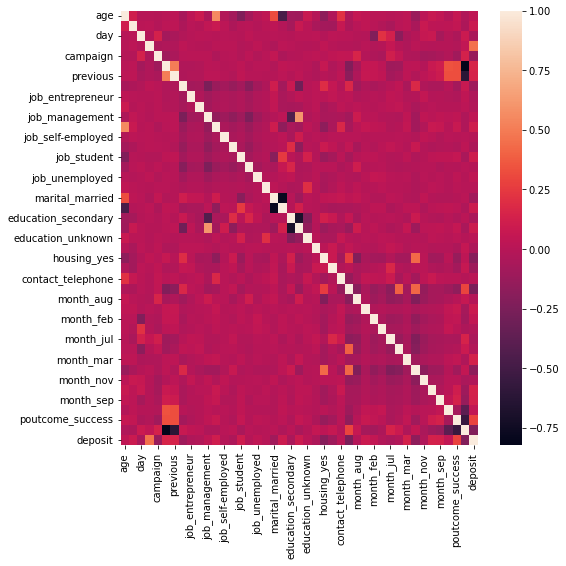

In [21]:
plt.figure(figsize=(8,8))
sns.heatmap(df_nw.corr())
plt.show()

### Split the dataset into input and target variables

In [22]:
X=df_nw.drop(['deposit'],axis=1)
y=df_nw['deposit']

### Standardise our dataset using StandardScaler

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
xcolumns = X.columns

In [43]:
X=scaler.fit_transform(X)

In [44]:
X=pd.DataFrame(X,columns=xcolumns)

In [45]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.491505,0.252525,-1.265746,1.930226,-0.554168,-0.481184,-0.36326,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,0.870355,-0.678403,1.018994,-0.702598,-0.215873,-0.123617,1.055280,-0.387923,-0.272963,1.938527,-0.396892,-0.099764,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626
1,1.239676,-0.459974,-1.265746,3.154612,-0.554168,-0.481184,-0.36326,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,0.870355,-0.678403,1.018994,-0.702598,-0.215873,-0.123617,-0.947616,-0.387923,-0.272963,1.938527,-0.396892,-0.099764,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626
2,-0.019470,-0.080160,-1.265746,2.929901,-0.554168,-0.481184,-0.36326,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,2.263377,-0.18177,-0.079441,0.870355,-0.678403,1.018994,-0.702598,-0.215873,-0.123617,1.055280,-0.387923,-0.272963,1.938527,-0.396892,-0.099764,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626
3,1.155733,0.293762,-1.265746,0.596366,-0.554168,-0.481184,-0.36326,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,3.330642,-0.182557,-0.441818,-0.18177,-0.079441,0.870355,-0.678403,1.018994,-0.702598,-0.215873,-0.123617,1.055280,-0.387923,-0.272963,1.938527,-0.396892,-0.099764,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626
4,1.071790,-0.416876,-1.265746,0.867171,-0.186785,-0.481184,-0.36326,-0.459229,-0.173997,-0.158636,-0.546362,-0.273721,-0.194036,-0.300242,-0.182557,-0.441818,-0.18177,-0.079441,0.870355,-0.678403,-0.981360,1.423289,-0.215873,-0.123617,-0.947616,-0.387923,-0.272963,1.938527,-0.396892,-0.099764,-0.273342,-0.178322,-0.396136,-0.350625,-0.159228,1.718298,-0.303775,-0.190781,-0.171522,-0.224814,-0.325782,0.583626


### Split dataset into training and testing set

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

### Check the shape of X_train and X_test

In [49]:
X_train.shape

(8929, 42)

In [50]:
X_test.shape

(2233, 42)

### Create Decision Tree model and train it

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
decision=DecisionTreeClassifier()

In [54]:
decision.fit(X_train,y_train)


DecisionTreeClassifier()

### Check the score of our model

In [55]:
decision.score(X_train,y_train)

1.0

### Predict using X_test

In [56]:
y_pred=decision.predict(X_test)

### Check the accuracy of our prediction

In [57]:
from sklearn import metrics

In [58]:
metrics.accuracy_score(y_test,y_pred)

0.7819077474249888

### Create a confusion matrix

In [59]:
metrics.confusion_matrix(y_test,y_pred)

array([[925, 236],
       [251, 821]], dtype=int64)

### Plot confusion matrix on heatmap

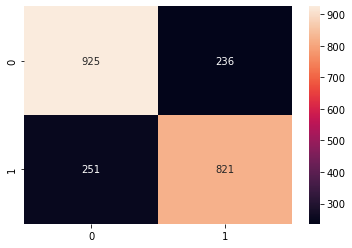

In [62]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred),annot=True,fmt="d")
plt.show()

### Create classification report

In [63]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1161
           1       0.78      0.77      0.77      1072

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233



***